In [2]:
# import libraries
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer,f1_score
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read file, giving names to columns
df = pd.read_csv('C:\cygwin64\home\salis\data\iris-slwc.txt', header=None, names=['l','w','c'])

In [4]:
# preview data
df.head()

,l,w,c
0,5.9,3.0,1
1,6.9,3.1,1
2,6.6,2.9,1
3,4.6,3.2,-1
4,6.0,2.2,1


In [8]:
#X = df.drop(df[:2], axis=1)
X = df[df.columns[:-1]]
#y = df[:2]
y = df['c']

In [9]:
X

,l,w
0,5.9,3.0
1,6.9,3.1
2,6.6,2.9
3,4.6,3.2
4,6.0,2.2
...,...,...
145,5.4,3.4
146,5.5,2.6
147,6.7,3.0
148,7.7,3.8


In [10]:
y

0      1
1      1
2      1
3     -1
4      1
      ..
145   -1
146    1
147    1
148    1
149   -1
Name: c, Length: 150, dtype: int64

In [17]:
# split data into train/test
seed = 123
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],
                                                    df['c'],
                                                    train_size=0.75,
                                                    random_state=seed,
                                                    stratify=df['c'])

In [19]:
# preview train features
x_train.head()

,l,w
15,5.0,3.4
91,4.4,3.2
27,4.6,3.1
2,6.6,2.9
26,5.5,2.3


In [20]:
# preview train target
y_train.head()

15   -1
91   -1
27   -1
2     1
26    1
Name: c, dtype: int64

In [7]:
# create a pipeline for svc model
svcpipe = Pipeline([('ss', StandardScaler()),
                        ('svc', SVC(class_weight='balanced',random_state=123))
                       ])

In [11]:
# create scorer
f1s = make_scorer(f1_score, average='binary')

In [21]:
# create parameter dict
params = {'svc__kernel': ['linear','poly','rbf'],
          'svc__C': [0.1,1,10,100],
          'svc__tol': [.0001,.001,.01]}

In [22]:
# create grid search
grid = GridSearchCV(svcpipe,
                       param_grid=params,
                       scoring=f1s,
                       n_jobs=-1,
                       cv=5)

In [23]:
# fit model, with various parameters using grid
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'poly', 'rbf'],
                         'svc__tol': [0.0001, 0.001, 0.01]},
             scoring=make_scorer(f1_score, average=binary))

In [24]:
# check results
grid.cv_results_

{'mean_fit_time': array([0.00519295, 0.0064352 , 0.00999837, 0.00959921, 0.00623226,
        0.00659528, 0.00601435, 0.0071938 , 0.00640254, 0.0085999 ,
        0.00679898, 0.0063992 , 0.00582752, 0.0050252 , 0.00560145,
        0.00640163, 0.00642939, 0.00623031, 0.00580001, 0.00660052,
        0.00620103, 0.00619793, 0.00639892, 0.0057981 , 0.00480223,
        0.00560288, 0.00600133, 0.00660114, 0.00640302, 0.00622773,
        0.00620031, 0.00659847, 0.00739923, 0.00660081, 0.00659847,
        0.00499773]),
 'std_fit_time': array([0.00073824, 0.00082705, 0.00244744, 0.00079978, 0.00191717,
        0.00048431, 0.00062292, 0.00117174, 0.00048907, 0.00338275,
        0.00039935, 0.00048995, 0.00041902, 0.00109384, 0.00135509,
        0.00048815, 0.00046959, 0.00038933, 0.00040019, 0.00048874,
        0.00075126, 0.00116581, 0.00048959, 0.00075037, 0.0013263 ,
        0.00079932, 0.00063241, 0.00048837, 0.00048946, 0.00074288,
        0.00040139, 0.00049019, 0.00185565, 0.00080047, 0.000

In [25]:
# get best score
grid.best_score_

1.0

In [26]:
# get best set of parameters
grid.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear', tol=0.0001))])

In [27]:
# create model w/ best set of parameters
best_model = Pipeline(steps=[('ss', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear', tol=0.0001))])

In [28]:
# fit model on train data
best_model.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear', tol=0.0001))])

In [34]:
# use model to predict results w/ test set
predicted = best_model.predict(x_test)

In [36]:
# check actual test target against predicted values
f1_score(y_test, predicted)

0.9803921568627451

In [38]:
# results are acceptable, create a productionized model
final_model = Pipeline(steps=[('ss', StandardScaler()),('svc', SVC(C=0.1, kernel='linear', tol=0.0001))])

In [42]:
# fit it against the entire data set
final_model.fit(df.drop('c',axis=1), df['c'])

Pipeline(steps=[('ss', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear', tol=0.0001))])

In [45]:
final_model.score(df.drop('c',axis=1), df['c'])

0.9933333333333333

In [66]:
w = final_model['svc'].coef_[0]

Text(0.5, 1.0, 'SVC with linear kernel')

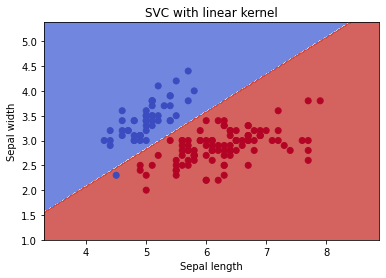

In [99]:
# Adapted from sklearn documentation: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

# step size in the mesh
h = .02  

# create a mesh to plot in
x_min, x_max = min(df['l']) - 1, max(df['l']) + 1
y_min, y_max = min(df['w']) - 1, max(df['w']) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

### This Z object is the only thign I don't really understand???
Z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(df['l'], df['w'], c=df['c'], cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with linear kernel')